Import all the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the dataset

In [5]:
df =pd. read_csv("train.csv")

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Check theoverview of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
df.shape

(9800, 18)

finding total missing values

In [10]:
null_count = df['Postal Code'].isnull().sum()
print(null_count)

11


Replace the empty values with null

In [11]:
df['Postal Code'].fillna(0, inplace=True)


<ipython-input-11-fc0678e69917>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


change from float to integer

In [12]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Data Description

In [14]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


### Data Cleaning
checking for duplicates

In [15]:
# methods to do it
# 1. using conditional statements
if df.duplicated().sum() > 0:
  print('Duplicates found')
else:
  print('No duplicates found')

No duplicates found


In [16]:
# 2. duplicated()
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9795,False
9796,False
9797,False
9798,False


In [17]:
# 3. pandas duplicated()
df.duplicated(keep=False).sum()

np.int64(0)

### Customer Analysis
Customer segmentation

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [20]:
# types of customers

types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [29]:
# number of customers in each segment

number_of_customers = df['Segment'].value_counts().reset_index()

number_of_customers = number_of_customers.rename(columns={'Segment' : 'Customer Type', 'count':'Total Customers'})

print(number_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


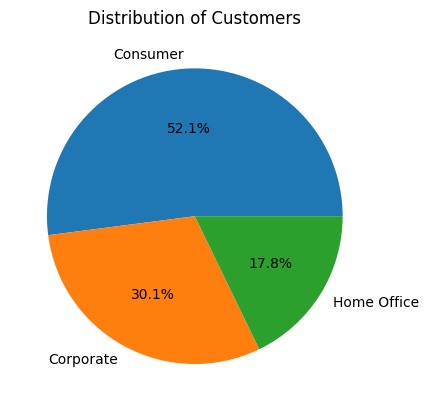

In [30]:
# plotting a pie chart

plt.pie(number_of_customers['Total Customers'], labels=number_of_customers['Customer Type'], autopct='%1.1f%%')

# set pie chart labels
plt.title('Distribution of Customers')

plt.show()

Customers and Sales

In [33]:
sales_per_category = df.groupby('Segment')['Sales'].sum().reset_index()

sales_per_category = sales_per_category.rename(columns={'Segment' : 'Customer Type', 'Sales':'Total Sales'})

print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


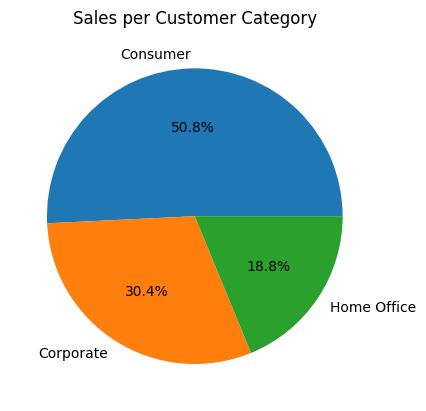

In [34]:
# plotting a pie chart

plt.pie(sales_per_category['Total Sales'], labels=sales_per_category['Customer Type'], autopct='%1.1f%%')

# set pie chart labels
plt.title('Sales per Customer Category')

plt.show()

Text(0, 0.5, 'Total Sales')

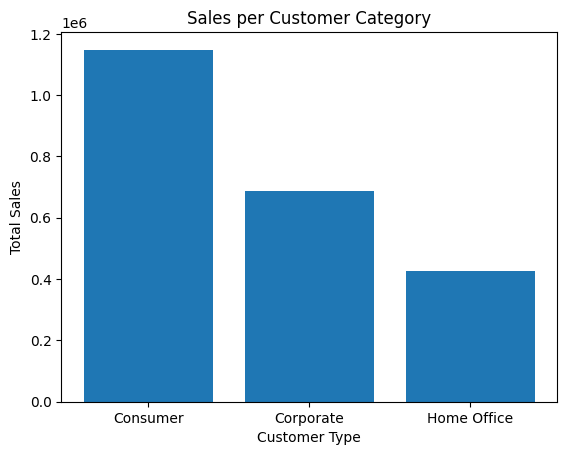

In [38]:
# bar graph
plt.bar(sales_per_category['Customer Type'], sales_per_category['Total Sales'])

# label
plt.title("Sales per Customer Category")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")

# the consumer segment is the most sold

Customer Loyalty

In [39]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [42]:
# group data according to: Customer ID, Customer Name, Segemnt and Calculate frequency of their order

customer_order_freq = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# rename the order id column
customer_order_freq.rename(columns={'Order ID' : 'Total Orders'}, inplace=True)

# identify repeat customers
repeat_customers = customer_order_freq[customer_order_freq['Total Orders' ]>= 1]

# sort repeat  customer in descending order
sorted_repeat_customer = repeat_customers.sort_values(by = 'Total Orders', ascending=False)

print(sorted_repeat_customer.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


In [44]:
# group data based on: Customer ID, customer Name and Sales

Customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# sorting descending order

top_spenders = Customer_sales.sort_values(by='Sales', ascending=False)

#print
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


Mode of Shipping

In [45]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [46]:
# sorting unique values in the ship mode column into a new series

type_of_shipping = df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [51]:
# frequency use of shipping methods

shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={'Ship Mode': 'Mode of Shipment', 'count': 'Use Frequency'})

print(shipping_mode)

  Mode of Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538


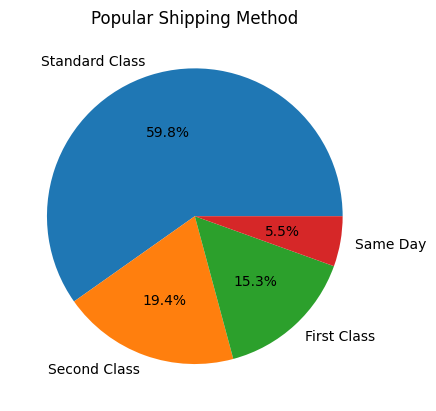

In [53]:
# plotting a pie chart
plt.pie(shipping_mode['Use Frequency'], labels=shipping_mode['Mode of Shipment'], autopct='%1.1f%%')

# set labels

plt.title("Popular Shipping Method")
plt.show()

Geographical Analysis

In [61]:
# customer by state
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State', 'count': 'Number of Customers'})

print(state.head(5))

          State  Number of Customers
0    California                 1946
1      New York                 1097
2         Texas                  973
3  Pennsylvania                  582
4    Washington                  504


In [62]:
# customer by city
city = df['City'].value_counts().reset_index()
city = city.rename(columns={'index': 'City', 'count': 'Number of Customers'})

print(city.head(5))

            City  Number of Customers
0  New York City                  891
1    Los Angeles                  728
2   Philadelphia                  532
3  San Francisco                  500
4        Seattle                  426


In [63]:
# sales per state

# grouping state and sales
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

# sorting with descending order
top_state_sales = state_sales.sort_values(by='Sales', ascending=False)

print(top_state_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [64]:
# sales per city

# grouping city and sales
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# sorting with descending order
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


Product Analysis

In [65]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [66]:
# types of product categories

products_category = df['Category'].unique()
print(products_category)

['Furniture' 'Office Supplies' 'Technology']


In [79]:
# products per category


products_category = df['Category'].value_counts().reset_index()

products_category = products_category.rename(columns={'Category' : 'Product Category', 'count':'Total Products'})

print(products_category)

  Product Category  Total Products
0  Office Supplies            5909
1        Furniture            2078
2       Technology            1813


In [80]:
# types of product sub categories

products_sub_category = df['Sub-Category'].unique()
print(products_sub_category)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [85]:
# group by product category

subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

# sort by asceding order
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=True)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0        Furniture             4
1       Technology             4
2  Office Supplies             9


In [84]:
# sales per each category

category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

# sort in descending order
category_sales = category_sales.sort_values(by='Sales', ascending = False)

print(category_sales.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


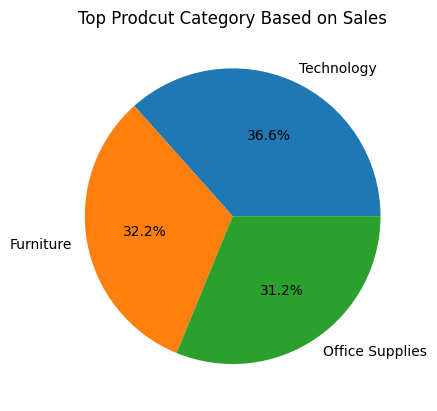

In [87]:
# plotting a pie chart
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%')

# set labels

plt.title("Top Prodcut Category Based on Sales")
plt.show()

In [88]:
# group data by product sub-category vs sales

pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

#sorting in descending order
top_pdt_subcategory = pdt_subcategory.sort_values(by='Sales', ascending=False)

print(top_pdt_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


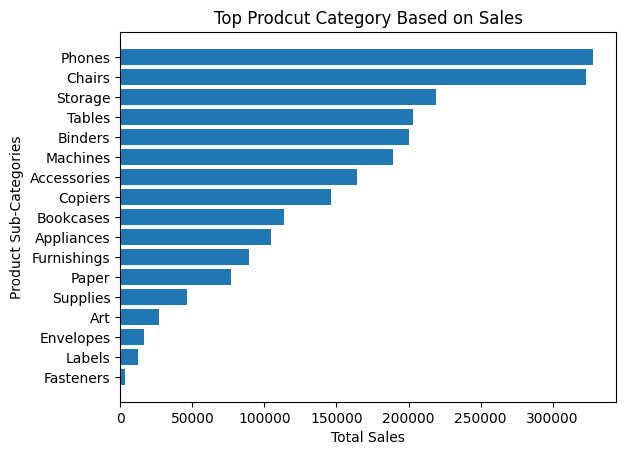

In [92]:
top_pdt_subcategory = top_pdt_subcategory.sort_values(by='Sales', ascending=True)
# plotting a horizontal bar graph

plt.barh(top_pdt_subcategory['Sub-Category'], top_pdt_subcategory['Sales'])

# label
plt.title("Top Prodcut Category Based on Sales")
plt.ylabel('Product Sub-Categories')
plt.xlabel('Total Sales')

plt.show()

Sales analysis

In [94]:
# convert order date to date time format

df['Order Date'] = pd.to_datetime(df['Order Date'] , dayfirst=True)

# grouping by year and summing the sales per year

yearly_sales = df.groupby(df['Order Date'] .dt.year)['Sales'].sum()

# setting new index and renaming the columns
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales': 'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


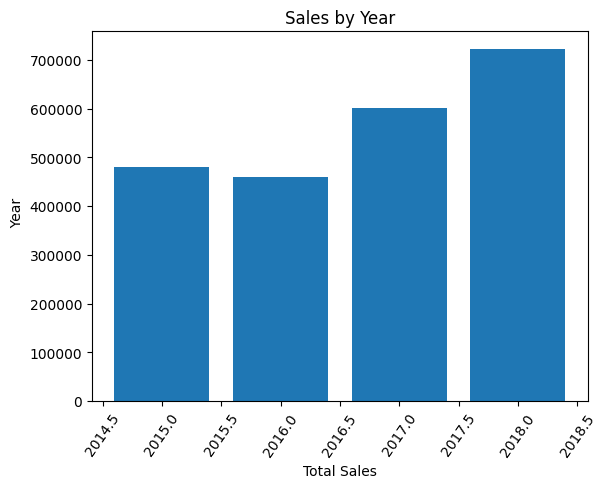

In [102]:
# plotting a bar graph

plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

# label
plt.title("Sales by Year")
plt.ylabel('  Year')
plt.xlabel('Total Sales')
plt.xticks(rotation=55)

plt.show()


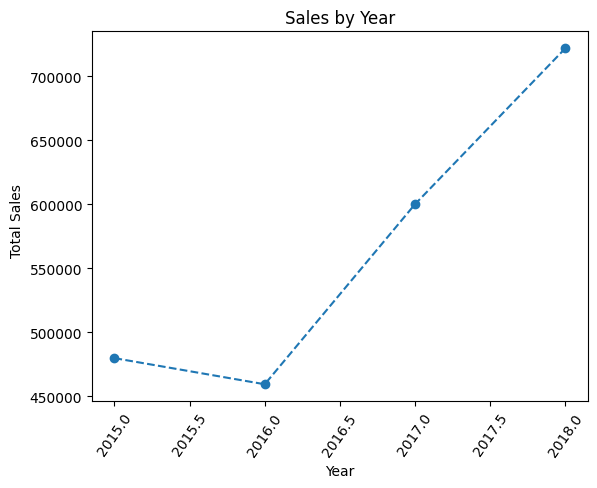

In [109]:
# plotting a line graph

plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='--')

# label
plt.title("Sales by Year")
plt.ylabel('Total Sales  ')
plt.xlabel('Year')
plt.xticks(rotation=55)
plt.show()


Quarterly Sales Analysis

In [113]:
# convert order date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# filter date according to year
year_sales = df[df['Order Date'].dt.year == 2018]

# calculate quarterly sales for year 2018
quarterly_sales = year_sales.resample('Q', on ='Order Date')['Sales'].sum()

#rename columns
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date' : 'Quarter', 'Sales': 'Total Sales'})

print('This are the Quarterly Sales for 2018')
print(quarterly_sales)

This are the Quarterly Sales for 2018
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


<ipython-input-113-3070114718c5>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = year_sales.resample('Q', on ='Order Date')['Sales'].sum()


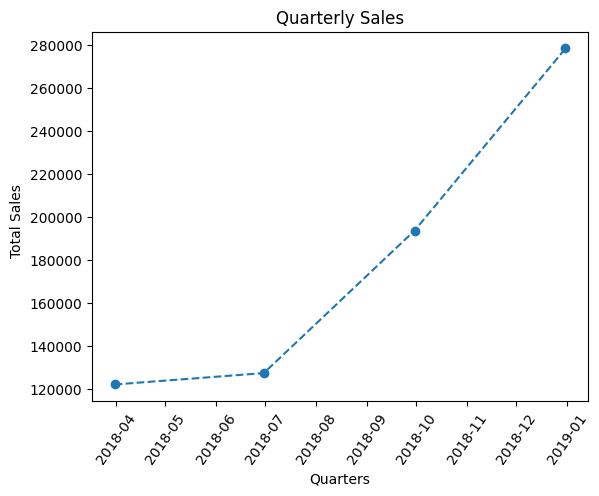

In [117]:
# plotting a line graph

plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', linestyle='--')

# label
plt.title("Quarterly Sales")
plt.ylabel('Total Sales  ')
plt.xlabel('Quarters')
plt.xticks(rotation=55)
plt.show()


Monthly Sales Trend for a Year

In [118]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# filter date according to year
year_sales = df[df['Order Date'].dt.year == 2018]

# calculate quarterly sales for year 2018
monthly_sales = year_sales.resample('M', on ='Order Date')['Sales'].sum()
#rename columns
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date' : 'Month', 'Sales': 'Total Monthly Sales'})

print('This are the Monthly Sales for 2018')
print(monthly_sales)

This are the Monthly Sales for 2018
        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


<ipython-input-118-a0e6c7590c0f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = year_sales.resample('M', on ='Order Date')['Sales'].sum()


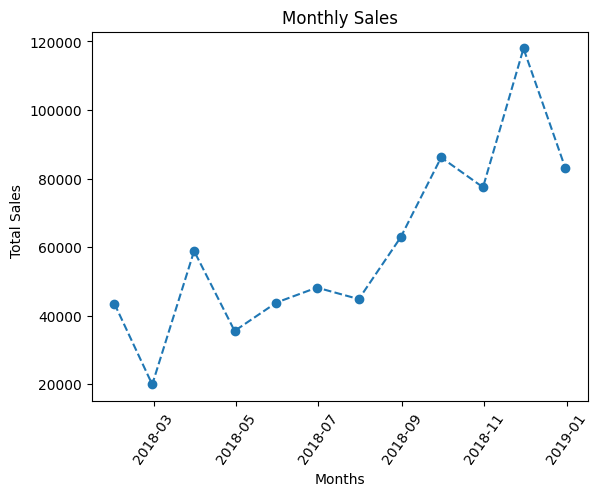

In [122]:
# plotting a line graph

plt.plot(monthly_sales['Month'], monthly_sales['Total Monthly Sales'], marker='o', linestyle='--')

# label
plt.title("Monthly Sales")
plt.ylabel('Total Sales  ')
plt.xlabel('Months')
plt.xticks(rotation=55)
plt.show()
